In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

PATH = os.path.abspath('.') 

In [2]:
def drawGantChart(fromFilename = 'gantData.csv', toFilename = 'gantFig.png'):
    """
    使用甘特图时间表绘制甘特图
    fromFilename  时间表csv文件名
    toFilename    甘特图文件名
    如果想改变颜色，颜色名参考：https://matplotlib.org/users/colors.html
    """
    plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签  
    plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号  

    height=16 # 柱体高度，设为2的整数倍，方便Y轴label居中，如果设的过大，柱体间的间距就看不到了，需要修改下面间隔为更大的值
    interval=4 # 柱体间的间隔
    # colors = ("turquoise","crimson","black","red","yellow","green","brown","blue") # 颜色，不够再加
    colors = ("wheat","tan","lavender","lightblue","silver","pink") # 颜色，不够再加
    # colors = ("ivory","ivory","ivory","ivory","ivory","ivory") # 颜色，不够再加
    x_label=u"调度时刻" # 设置x轴label

    # df = pd.read_csv(io.StringIO(data), header=None, names=["Machine", "Start", "Finish","Title"] )
    df = pd.read_csv(PATH+"\\"+fromFilename, header=None, names=["Machine", "Start", "Finish","Title"])
    df["Diff"] = df.Finish - df.Start
    fig,ax=plt.subplots(figsize=(30,10))
    labels=[]
    count=0;
    for i,machine in enumerate(df.groupby("Machine")):
        labels.append(machine[0])
        data=machine[1]
        for index,row in data.iterrows():
    #         ax.broken_barh([(row["Start"],row["Diff"])], ((height+interval)*i+interval,height), facecolors=colors[i], edgecolor='brown')
    #         ax.broken_barh([(row["Start"],row["Diff"])], ((height+interval)*i+interval,height), facecolors='ivory', edgecolor='brown')
            if(row["Title"] == '*'):
                ax.broken_barh([(row["Start"],row["Diff"])], ((height+interval)*i+interval,height), facecolors='navy', edgecolor='brown')
            else:
#                 ax.broken_barh([(row["Start"],row["Diff"])], ((height+interval)*i+interval,height), facecolors=colors[int(row['Title'][0])], edgecolor='brown')
                ax.broken_barh([(row["Start"],row["Diff"])], ((height+interval)*i+interval,height), facecolors=colors[int(row['Title'].split('-')[0])], edgecolor='brown')  # 使显示的lot号、sublot号、机器号都能适用于一位数以上的
#             plt.text(row["Start"], (height+interval)*(i+1),row['Title'],fontsize=10)  # fontsize='x-small'
            plt.text(row["Start"], (height+interval)*(i+1)-height/2,row['Title'],fontsize=10)  # fontsize='x-small'
            if(row["Finish"] > count):
                count = row["Finish"]
    ax.set_ylim(0, (height+interval)*len(labels)+interval)
    ax.set_xlim(0, count+2)
    ax.set_xlabel(x_label)
    ax.set_yticks(range(int(interval+height/2),(height+interval)*len(labels),(height+interval)))
    ax.set_yticklabels(labels)
    # ax.grid(True) # 显示网格
    ax.xaxis.grid(True) # 只显示x轴网格
    # ax.yaxis.grid(True) # 只显示y轴网格
    plt.savefig(PATH+"\\"+toFilename,dpi=160)
    plt.show()


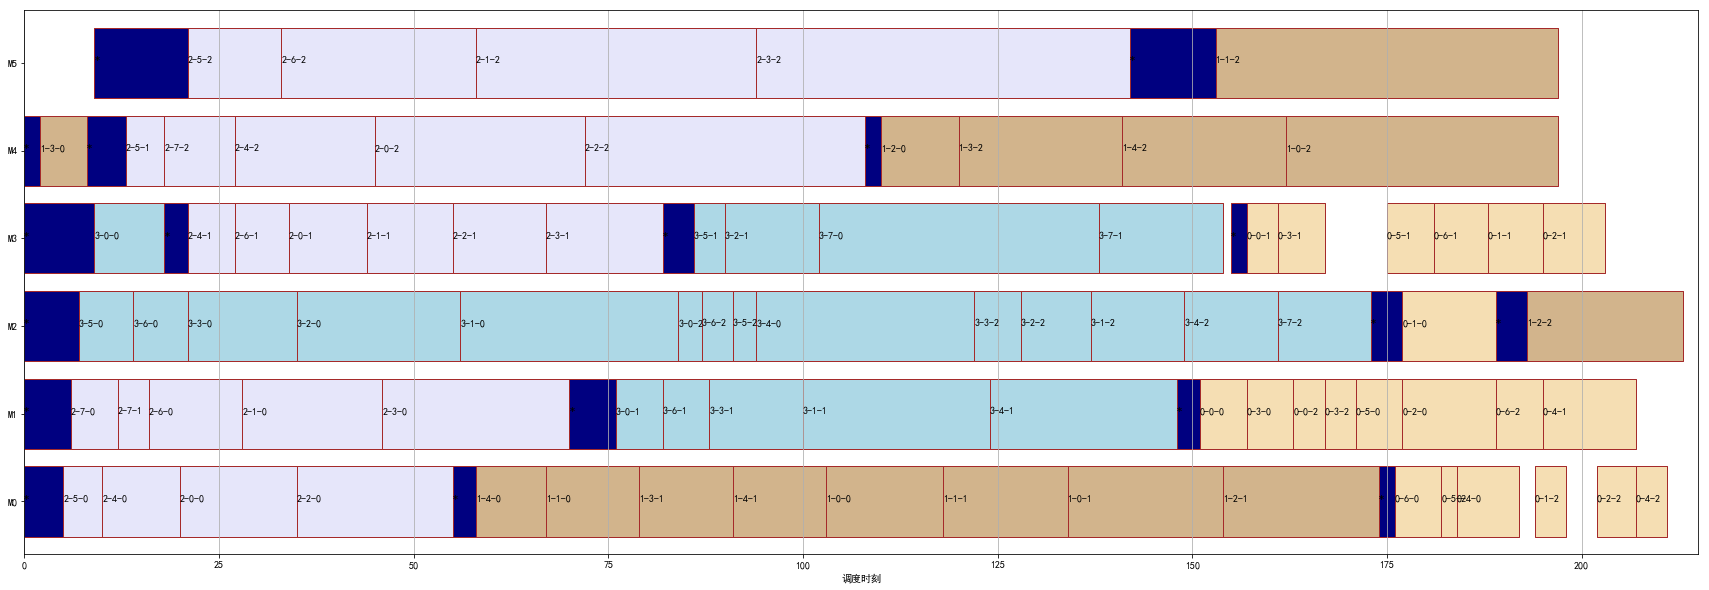

In [9]:
drawGantChart()

In [72]:
%who

Interactive namespace is empty.


In [71]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [79]:
%whos

Variable        Type        Data/Info
-------------------------------------
drawGantChart   function    <function drawGantChart at 0x0000000B412F2E18>
io              module      <module 'io' from 'D:\\TY<...>onda3_setup\\lib\\io.py'>
pd              module      <module 'pandas' from 'D:<...>es\\pandas\\__init__.py'>
plt             module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


In [80]:
drawGantChart?

In [14]:
a=[191, 191, 191, 191, 196, 196, 191, 196, 191, 191, 191, 196, 196, 196, 191, 191, 191, 191, 191, 196, 196, 196, 196, 196, 191, 191, 191, 191, 191, 191, 191, 196, 191, 196, 191, 191, 191, 191, 191, 196, 191, 196, 191, 191, 191, 191, 191, 191, 191, 191, 191, 196, 191, 196, 191, 196, 191, 191, 191, 196, 196, 196, 191, 191, 191, 196, 191, 191, 191, 191, 196, 196, 196, 196, 191, 191, 191, 191, 191, 196, 191, 191, 191, 191, 191, 196, 191, 196, 191, 191, 191, 191, 191, 191, 191, 196, 191, 191, 191, 191, 191, 196, 191, 191, 191, 191, 191, 191, 191, 191, 191, 196, 191, 191, 191, 196, 191, 196, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 196, 196, 196, 191, 191, 191, 196, 191, 191, 191, 196, 191, 191, 196, 196, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 196, 196, 191, 191, 196, 196, 191, 191, 191, 191, 191, 196, 191, 196, 191, 191, 191, 191, 191, 196, 191, 196, 191, 191, 191, 196, 191, 191, 191, 191, 191, 191, 191, 191, 191, 196, 191, 196, 191, 191, 196, 196, 191, 191, 191, 196]

In [15]:
cnt=0
for item in a:
    if item==191:
        cnt+=1

In [16]:
cnt

145

In [18]:
import numpy as np
a=np.array([185,186,187,183,186,185,187,185,186,185])
b=np.array([185,188,183,185,185,187,184,185,183,189])

In [19]:
a.mean()

185.5

In [20]:
b.mean()

185.40000000000001

In [21]:
a.min()

183

In [22]:
b.min()

183

In [23]:
a.std()

1.1180339887498949

In [24]:
b.std()

1.9078784028338913

In [256]:
test=[1,2,3]
test.append(5)

In [345]:
a="""185
183
185
183
185
185
183
183
185
185
185
185
187
185
185
185
187
185
183
187"""


In [349]:
b=np.array([int(item) for item in a.split()])

In [359]:
a.count('183')

5

In [257]:
test

[1, 2, 3, 5]

In [500]:
a=[212, 223, 211, 213, 220, 221, 223, 208, 237, 226, 205, 214, 220, 229, 220, 220, 218, 223, 211, 217, 211, 205, 205, 211, 221, 223, 218, 211, 212, 205, 227, 227, 220, 218, 226, 213, 226, 211, 222, 242, 220, 217, 218, 242, 229, 217, 208, 208, 222, 223, 223, 211, 227, 221, 213, 208, 223, 223, 217, 213, 211, 229, 221, 237, 218, 206, 212, 211, 211, 221, 223, 217, 221, 223, 233, 227, 214, 220, 235, 211, 217, 211, 217, 221, 212, 208, 221, 220, 208, 211, 218, 221, 217, 221, 221, 211, 212, 211, 211, 220, 236, 227, 220, 217, 223, 220, 223, 221, 223, 223, 222, 227, 218, 208, 220, 223, 208, 223, 223, 211, 217, 213, 237, 237, 221, 217, 227, 208, 211, 211, 220, 220, 211, 220, 205, 221, 223, 220, 227, 211, 211, 223, 223, 218, 220, 206, 222, 242, 220, 211, 220, 217, 220, 211, 215, 220, 211, 211, 210, 208, 223, 218, 205, 223, 217, 211, 218, 235, 211, 211, 229, 217, 227, 217, 218, 223, 242, 211, 226, 222, 221, 222, 223, 237, 222, 220, 223, 217, 211, 217, 221, 226, 212, 228, 208, 213, 212, 217, 208, 223]

b=[114, 49, 108, 99, 0, 125, 57, 135, 184, 137, 162, 1, 120, 41, 160, 197, 117, 78, 120, 31, 31, 55, 51, 62, 113, 120, 40, 76, 130, 143, 181, 174, 81, 120, 181, 56, 37, 62, 61, 20, 59, 90, 12, 74, 105, 36, 52, 113, 73, 137, 43, 44, 166, 184, 163, 150, 79, 17, 78, 18, 45, 3, 160, 74, 139, 24, 161, 39, 111, 18, 138, 79, 183, 178, 187, 156, 17, 160, 6, 156, 81, 3, 86, 154, 53, 92, 107, 70, 151, 184, 137, 160, 112, 123, 132, 29, 178, 109, 188, 24]

c=[187, 189, 187, 189, 189, 187, 187, 201, 189, 187, 189, 189, 187, 187, 187, 187, 187, 189, 197, 187, 187, 189, 187, 187, 189, 187, 187, 187, 189, 187, 187, 187, 189, 189, 187, 204, 189, 189, 201, 187, 187, 187, 206, 189, 187, 189, 187, 187, 189, 187, 187, 189, 187, 187, 187, 187, 189, 188, 187, 187, 189, 187, 189, 189, 187, 187, 207, 189, 189, 187, 189, 189, 189, 187, 187, 194, 187, 187, 187, 189, 189, 187, 187, 187, 187, 189, 189, 187, 189, 189, 187, 187, 188, 187, 189, 187, 187, 187, 187, 187, 189, 187, 187, 213, 189, 188, 187, 187, 189, 187, 187, 187, 189, 187, 187, 187, 189, 189, 187, 189, 189, 189, 187, 189, 189, 188, 187, 187, 189, 187, 189, 187, 187, 187, 211, 198, 189, 188, 189, 187, 187, 187, 212, 187, 187, 187, 188, 187, 187, 187, 187, 187, 187, 187, 187, 189, 189, 187, 187, 218, 189, 189, 189, 189, 187, 189, 187, 189, 189, 187, 189, 189, 187, 189, 189, 187, 189, 187, 187, 187, 187, 187, 189, 189, 187, 187, 189, 189, 208, 189, 187, 187, 187, 187, 187, 187, 189, 187, 187, 187]


In [501]:
a.count(205)

6

In [463]:
a.count(183)

2

In [130]:
b[46]

52

In [131]:
b[45]

36

In [136]:
c[36]

189

In [145]:
c[184]

187

In [138]:
b.count(52)

1

In [139]:
b.count(36)

1

In [140]:
b.count(120)

4

In [326]:
d=[116, 42, 41, 123, 181, 84, 97, 65, 151, 120, 81, 52, 113, 59, 86, 87, 9, 161, 13, 18, 199, 171, 128, 82, 19, 108, 42, 146, 144, 106, 6, 5, 152, 29, 32, 149, 124, 127, 127, 172, 42, 14, 83, 97, 98, 90, 114, 116, 72, 90, 136, 191, 183, 173, 74, 111, 125, 162, 27, 76, 77, 68, 160, 198, 78, 179, 180, 35, 89, 180, 72, 62, 26, 155, 180, 86, 101, 118, 8, 134, 18, 17, 98, 110, 51, 85, 81, 73, 4, 91, 3, 0, 48, 23, 117, 65, 28, 79, 45, 162, 52, 80, 195, 109, 83, 64, 126, 46, 13, 175, 159, 170, 193, 4, 46, 14, 117, 81, 136, 114, 22, 168, 181, 70, 167, 2, 146, 11, 104, 20, 59, 139, 58, 67, 131, 179, 129, 39, 101, 125, 134, 193, 187, 24, 100, 117, 119, 175, 120, 41, 58, 153, 118, 153, 60, 199, 38, 93, 118, 142, 85, 98, 119, 111, 193, 81, 28, 148, 157, 174, 79, 10, 90, 32, 112, 185, 107, 20, 60, 76, 41, 103, 18, 134, 138, 12, 66, 127, 34, 113, 23, 135, 132, 194, 4, 45, 45, 151, 100, 198]

len(set(d))

133

In [324]:
126/200

0.63

In [ ]:
[6, 77, 101, 173, 166, 84, 1, 29, 118, 57, 10, 121, 106, 16, 9, 83, 130, 168, 164, 1, 191, 8, 63, 59, 42, 172, 151, 158, 152, 39, 51, 0, 27, 40, 162, 74, 145, 141, 163, 133, 154, 50, 131, 106, 13, 120, 175, 50, 82, 76, 129, 184, 116, 9, 133, 193, 88, 121, 133, 51, 137, 94, 124, 158, 131, 189, 8, 94, 141, 53, 67, 36, 29, 55, 175, 77, 96, 95, 95, 61, 49, 123, 82, 164, 82, 117, 39, 53, 26, 33, 151, 163, 111, 126, 177, 143, 173, 192, 154, 187, 45, 109]
result after 1 iterations: 186
[187, 189, 187, 189, 189, 187, 187, 201, 189, 187, 189, 189, 187, 187, 187, 187, 187, 189, 197, 187, 187, 189, 187, 187, 189, 187, 187, 187, 189, 187, 187, 187, 189, 187, 187, 204, 189, 189, 201, 187, 187, 187, 206, 189, 187, 189, 186, 187, 189, 187, 187, 189, 187, 187, 187, 187, 189, 188, 187, 187, 189, 187, 189, 189, 187, 187, 207, 189, 189, 187, 189, 189, 189, 187, 187, 194, 187, 187, 187, 189, 189, 187, 187, 187, 187, 189, 187, 187, 189, 189, 187, 187, 188, 187, 189, 187, 187, 187, 187, 187, 189, 187, 187, 213, 189, 187, 187, 187, 189, 187, 187, 187, 189, 187, 187, 187, 189, 189, 187, 189, 187, 189, 187, 189, 189, 188, 187, 187, 189, 187, 189, 187, 187, 187, 211, 198, 189, 187, 189, 187, 187, 187, 212, 187, 187, 187, 188, 187, 187, 187, 187, 187, 187, 187, 187, 189, 189, 187, 187, 218, 189, 189, 189, 189, 187, 189, 187, 189, 189, 187, 189, 189, 187, 189, 189, 187, 189, 187, 187, 187, 187, 187, 189, 189, 187, 187, 189, 189, 208, 189, 187, 187, 187, 187, 187, 187, 189, 187, 187, 187]


In [78]:
a=np.array(a)
a.std()

7.2554651815028368

In [61]:
b.count(183)

1

In [62]:
a.index(184)

15

In [63]:
b.index(183)

138

In [64]:
a[138]

186

In [66]:
b[15]

184

In [327]:
a=np.array([185,183,183,188,185,184,185,183,185,183,185,185,183,185,185,185,187,185,185,185])


In [329]:
a.std()

1.2688577540449519

In [334]:
[185,183,183,188,185,184,185,183,185,183,185,185,183,185,185,185,187,185,185,185].count(188)

1

In [277]:
x = np.array([2,1,4,5,7,3,6])
y = x.argsort()
z = [x[ind] for ind in y]

In [278]:
y

array([1, 0, 5, 2, 3, 6, 4], dtype=int64)

In [279]:
z

[1, 2, 3, 4, 5, 6, 7]

In [302]:
import pandas as pd
obj = pd.Series([7,5,7,4,2,0,4])
obj.rank(method = 'average')


0    6.5
1    5.0
2    6.5
3    3.5
4    2.0
5    1.0
6    3.5
dtype: float64

In [282]:
obj.rank?

In [400]:
def calRouletteWithRank(makespanList, Nmin):
    """
    功能：         计算基于排序的轮盘 Linear Ranking Selection

    输入：
    makespanList  输入一个完工时间的list
    Nmin          最差个体在种群中出现次数的期望值，Nmax=2-Nmin
                  根据'Gradual distributed real-coded genetic algorithms'，Nmin越小，seletive pressure越大，给较优个体的机会越多

    输出：
    roulette      输出一个轮盘概率list
    """
    rankList = pd.Series(makespanList)
    rankList = list(rankList.rank(method='average'))

    Nmax = 2 - Nmin
    pList = [(Nmax - (Nmax - Nmin) * (item - 1) / (len(rankList) - 1)) / len(rankList) for item in rankList]

    roulette = []
    temp = 0
    for i in range(len(pList)):
        temp += pList[i]
        roulette.append(temp)

    return roulette

def calRoulette(makespanList):
    """
    版本信息：     ver2
                  该版本不会改变传入makespanList的值

    功能：        由完工时间列表先计算fitness，再计算轮盘

    输入：
    makespanList  输入一个完工时间的list

    输出：
    roulette      输出一个轮盘概率list
    """
    makespanMax = max(makespanList)
    fitnessList = []
    for i in range(len(makespanList)):
        fitnessList.append(makespanMax - makespanList[i] + 1)
    fitnessSum = sum(fitnessList)
    for i in range(len(fitnessList)):
        fitnessList[i] /= fitnessSum
    roulette = []
    temp = 0
    for i in range(len(fitnessList)):
        temp += fitnessList[i]
        roulette.append(temp)
    return roulette

In [445]:
makespanList = [196, 194, 202, 210, 198, 191, 212, 202, 200, 211, 211, 213, 192, 196, 213, 203, 203, 214, 190, 196, 201, 196, 188, 192, 196, 189, 194, 209, 187, 186, 189, 199, 189, 196, 195, 195, 196, 199, 205, 199, 192, 204, 196, 201, 203, 196, 194, 201, 187, 196, 206, 200, 195, 196, 212, 196, 215, 211, 195, 196, 217, 189, 196, 203, 189, 218, 206, 190, 203, 202, 197, 188, 189, 194, 191, 192, 207, 223, 200, 203, 209, 204, 190, 199, 189, 200, 206, 211, 193, 201, 210, 196, 212, 196, 201, 216, 189, 194, 217, 199, 203, 213, 194, 204, 209, 189, 196, 203, 194, 199, 196, 189, 189, 215, 199, 189, 187, 192, 205, 196, 203, 202, 204, 217, 205, 194, 209, 197, 214, 209, 200, 200, 189, 212, 187, 197, 197, 193, 196, 206, 189, 197, 205, 204, 196, 213, 206, 199, 218, 189, 205, 203, 204, 198, 196, 205, 203, 203, 195, 204, 190, 201, 201, 189, 196, 207, 195, 190, 208, 189, 197, 201, 199, 206, 196, 199, 189, 194, 189, 186, 207, 194, 204, 213, 189, 213, 196, 189, 205, 185, 192, 198, 209, 205, 196, 199, 204, 189, 189, 203]


In [446]:
for Nmin in np.arange(0.01,1,0.05):    
    difference = np.array([calRouletteWithRank(makespanList, Nmin)[i] - calRoulette(makespanList)[i] for i in range(len(makespanList))])
    print('Nmin=',Nmin,':',difference.mean(),'+-',difference.std())
    means.append(difference.mean())

Nmin= 0.01 : 0.00211222101797 +- 0.00548671281866
Nmin= 0.06 : 0.00214250996269 +- 0.00491442610653
Nmin= 0.11 : 0.00217279890742 +- 0.00435193944767
Nmin= 0.16 : 0.00220308785214 +- 0.00380360310144
Nmin= 0.21 : 0.00223337679686 +- 0.00327652907021
Nmin= 0.26 : 0.00226366574159 +- 0.00278282510051
Nmin= 0.31 : 0.00229395468631 +- 0.00234367551714
Nmin= 0.36 : 0.00232424363103 +- 0.00199543000798
Nmin= 0.41 : 0.00235453257576 +- 0.00179189662128
Nmin= 0.46 : 0.00238482152048 +- 0.00178333190502
Nmin= 0.51 : 0.00241511046521 +- 0.00197227748125
Nmin= 0.56 : 0.00244539940993 +- 0.00231078143496
Nmin= 0.61 : 0.00247568835465 +- 0.0027440426044
Nmin= 0.66 : 0.00250597729938 +- 0.00323420088845
Nmin= 0.71 : 0.0025362662441 +- 0.00375906471831
Nmin= 0.76 : 0.00256655518882 +- 0.00430596171877
Nmin= 0.81 : 0.00259684413355 +- 0.0048674707691
Nmin= 0.86 : 0.00262713307827 +- 0.00543906827041
Nmin= 0.91 : 0.00265742202299 +- 0.00601788020899
Nmin= 0.96 : 0.00268771096772 +- 0.00660200934313


In [422]:
np.arange(0.01,1,0.05)   

array([ 0.01,  0.06,  0.11,  0.16,  0.21,  0.26,  0.31,  0.36,  0.41,
        0.46,  0.51,  0.56,  0.61,  0.66,  0.71,  0.76,  0.81,  0.86,
        0.91,  0.96])

In [404]:
makespanList

[229, 243, 221, 224, 200, 225, 227, 214, 243, 249, 264, 235]

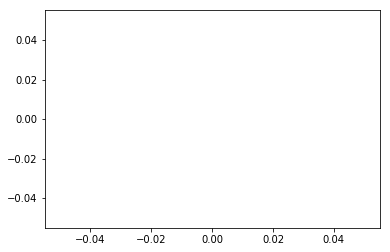

In [434]:
plt.plot(x=[ 0.01,  0.06,  0.11,  0.16,  0.21,  0.26,  0.31,  0.36,  0.41])
plt.show()

In [430]:
import matplotlib.pyplot as plt

In [498]:
makespan = [211, 220, 237, 223, 223, 237, 223, 226, 217, 218, 223, 227, 220, 223, 226, 206, 211, 217, 222, 211, 212, 217, 227, 206, 212, 211, 211, 211, 221, 227, 223, 223, 236, 217, 220, 220, 220, 217, 222, 218, 221, 220, 218, 220, 208, 205, 220, 232, 227, 227, 229, 237, 211, 223, 232, 223, 218, 211, 223, 221, 220, 206, 223, 211, 219, 217, 243, 232, 237, 217, 227, 228, 217, 233, 221, 227, 220, 223, 223, 221, 223, 237, 218, 229, 217, 227, 226, 218, 222, 227, 220, 212, 226, 228, 225, 220, 212, 220, 232, 223, 220, 206, 243, 227, 221, 226, 227, 226, 220, 217, 220, 223, 212, 222, 220, 232, 223, 242, 217, 232, 226, 227, 215, 211, 223, 229, 228, 227, 226, 236, 222, 226, 223, 218, 227, 233, 222, 239, 237, 217, 223, 242, 223, 227, 223, 226, 215, 210, 223, 221, 215, 226, 223, 212, 221, 226, 235, 217, 233, 233, 222, 221, 211, 221, 206, 223, 226, 217, 237, 223, 237, 229, 220, 220, 242, 217, 206, 208, 222, 217, 211, 208, 208, 227, 233, 227, 220, 211, 206, 206, 226, 218, 218, 223, 220, 223, 222, 227, 226, 211]

In [499]:
(calRouletteWithRank(makespan, 0.9))

[0.0053969849246231164,
 0.010530150753768846,
 0.015077889447236183,
 0.019992462311557789,
 0.024907035175879395,
 0.029454773869346734,
 0.034369346733668343,
 0.039170854271356789,
 0.044447236180904529,
 0.049660804020100507,
 0.054575376884422114,
 0.059293969849246231,
 0.064427135678391964,
 0.06934170854271357,
 0.074143216080402016,
 0.079620603015075384,
 0.085017587939698505,
 0.090293969849246244,
 0.095301507537688457,
 0.10069849246231158,
 0.10604522613065329,
 0.11132160804020103,
 0.11604020100502514,
 0.12151758793969851,
 0.12686432160804023,
 0.13226130653266335,
 0.13765829145728647,
 0.1430552763819096,
 0.14811055276381915,
 0.15282914572864328,
 0.1577437185929649,
 0.16265829145728652,
 0.16723115577889455,
 0.17250753768844229,
 0.17764070351758801,
 0.18277386934673373,
 0.18790703517587945,
 0.19318341708542719,
 0.19819095477386939,
 0.20340452261306538,
 0.20845979899497494,
 0.21359296482412066,
 0.21880653266331665,
 0.22393969849246237,
 0.229386934673

In [507]:
test="""
0         183          187
1         187          195
2         185          185
3         183          196
4         185          204
5         185          188
6         183          188
7         185          195
8         185          189
9         183          199
10        185          189
11        185          188
12        183          192
13        183          194
14        185          189
15        185          193
16        185          189
17        185          192
18        183          192
19        185          195
""".split()

In [537]:
a=np.array([int(test[i]) for i in range(len(test)) if i%3==1])
b=np.array([int(test[i]) for i in range(len(test)) if i%3==2])

In [548]:
b.mean()

191.94999999999999

In [555]:
[int(test[i]) for i in range(len(test)) if i%3==2].count(193)

1

In [551]:
b

array([187, 195, 185, 196, 204, 188, 188, 195, 189, 199, 189, 188, 192,
       194, 189, 193, 189, 192, 192, 195])